In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 
import graphviz
import seaborn as sns

In [15]:
df = pd.read_csv("rainfall.csv")

In [17]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1025.9,19.9,18.3,16.8,13.1,72,49,9.3,80.0,26.3,yes
1,1022.0,21.7,18.9,17.2,15.6,81,83,0.6,50.0,15.3,yes
2,1019.7,20.3,19.3,18.0,18.4,95,91,0.0,40.0,14.2,yes
3,1018.9,22.3,20.6,19.1,18.8,90,88,1.0,50.0,16.9,yes
4,1015.9,21.3,20.7,20.2,19.9,95,81,0.0,40.0,13.7,yes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pressure                366 non-null    float64
 1   maxtemp                 366 non-null    float64
 2   temparature             366 non-null    float64
 3   mintemp                 366 non-null    float64
 4   dewpoint                366 non-null    float64
 5   humidity                366 non-null    int64  
 6   cloud                   366 non-null    int64  
 7   sunshine                366 non-null    float64
 8            winddirection  365 non-null    float64
 9   windspeed               365 non-null    float64
 10  rainfall                366 non-null    object 
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [21]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [23]:
df.isnull().sum()

pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
sunshine                  0
         winddirection    1
windspeed                 1
rainfall                  0
dtype: int64

In [25]:
df.columns = df.columns.str.strip()

In [27]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        1
rainfall         0
dtype: int64

In [29]:
def wind_direction(degrees):
    if degrees >= 315 or degrees < 45:
        return 'N'
    elif 45 <= degrees < 135:
        return 'E'
    elif 135 <= degrees < 225:
        return 'S'
    else:
        return 'W'

df["wind_direct_category"] = df["winddirection"].apply(wind_direction)
df.drop(columns=["winddirection"], inplace=True)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pressure              366 non-null    float64
 1   maxtemp               366 non-null    float64
 2   temparature           366 non-null    float64
 3   mintemp               366 non-null    float64
 4   dewpoint              366 non-null    float64
 5   humidity              366 non-null    int64  
 6   cloud                 366 non-null    int64  
 7   sunshine              366 non-null    float64
 8   windspeed             365 non-null    float64
 9   rainfall              366 non-null    object 
 10  wind_direct_category  366 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 31.6+ KB


### Above we changed the wind direction to 'NWSE' Values 

### Now we are going to change the rest of the columns to categorical as well, we will be using a qcut to give it evenly distributed values.

In [35]:
print(df["pressure"].describe())

count     366.000000
mean     1013.742623
std         6.414776
min       998.500000
25%      1008.500000
50%      1013.000000
75%      1018.100000
max      1034.600000
Name: pressure, dtype: float64


In [37]:
df["pressure"] = pd.qcut(df["pressure"], q=3, labels=["Low", "Medium", "High"])

In [39]:
print(df["pressure"].describe())

count     366
unique      3
top       Low
freq      124
Name: pressure, dtype: object


In [41]:
df.rename(columns={"temparature": "temperature"}, inplace=True)

In [43]:
df["maxtemp"] = pd.qcut(df["maxtemp"], q=3, labels=["Low", "Medium", "High"])

In [45]:
df["temperature"] = pd.qcut(df["temperature"], q=3, labels=["Low", "Medium", "High"])

In [47]:
df["dewpoint"] = pd.qcut(df["dewpoint"], q=3, labels=["Low", "Medium", "High"])

In [49]:
df["humidity"] = pd.qcut(df["humidity"], q=3, labels=["Low", "Medium", "High"])

In [51]:
df["cloud"] = pd.qcut(df["cloud"], q=3, labels=["Low", "Medium", "High"])

In [53]:
df["sunshine"] = pd.qcut(df["sunshine"], q=3, labels=["Low", "Medium", "High"])

In [55]:
df["windspeed"] = pd.qcut(df["windspeed"], q=3, labels=["Low", "Medium", "High"])


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pressure              366 non-null    category
 1   maxtemp               366 non-null    category
 2   temperature           366 non-null    category
 3   mintemp               366 non-null    float64 
 4   dewpoint              366 non-null    category
 5   humidity              366 non-null    category
 6   cloud                 366 non-null    category
 7   sunshine              366 non-null    category
 8   windspeed             365 non-null    category
 9   rainfall              366 non-null    object  
 10  wind_direct_category  366 non-null    object  
dtypes: category(8), float64(1), object(2)
memory usage: 12.6+ KB


### Two of the columns are showing as objects so we need to change it to category data types

In [60]:
df["wind_direct_category"] = df["wind_direct_category"].astype("category")
df["rainfall"] = df["rainfall"].astype("category")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pressure              366 non-null    category
 1   maxtemp               366 non-null    category
 2   temperature           366 non-null    category
 3   mintemp               366 non-null    float64 
 4   dewpoint              366 non-null    category
 5   humidity              366 non-null    category
 6   cloud                 366 non-null    category
 7   sunshine              366 non-null    category
 8   windspeed             365 non-null    category
 9   rainfall              366 non-null    category
 10  wind_direct_category  366 non-null    category
dtypes: category(10), float64(1)
memory usage: 7.9 KB


### We need to push rainfall to the end again so it acts as the target

In [65]:
rainfall_col = df.pop("rainfall")
df["rainfall"] = rainfall_col

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pressure              366 non-null    category
 1   maxtemp               366 non-null    category
 2   temperature           366 non-null    category
 3   mintemp               366 non-null    float64 
 4   dewpoint              366 non-null    category
 5   humidity              366 non-null    category
 6   cloud                 366 non-null    category
 7   sunshine              366 non-null    category
 8   windspeed             365 non-null    category
 9   wind_direct_category  366 non-null    category
 10  rainfall              366 non-null    category
dtypes: category(10), float64(1)
memory usage: 7.9 KB


### Everything is converted to categorical, now I am going to start doing finishing touches to clean up the data

### Dropping Duplicates

In [71]:
df.drop_duplicates(inplace=True)

### Checking and handling null values

In [74]:
df.isnull().sum()

pressure                0
maxtemp                 0
temperature             0
mintemp                 0
dewpoint                0
humidity                0
cloud                   0
sunshine                0
windspeed               1
wind_direct_category    0
rainfall                0
dtype: int64

In [76]:
df.dropna(inplace=True)

### Decided to just drop the null value since it was only one

In [79]:
df.to_csv("cleaned_weather_data.csv", index=False)

In [122]:
df_cleaned = pd.read_csv("cleaned_weather_data.csv")

### For some reason the mintemp and winddirection got reverted back to numeric so I am redoing those now

In [125]:
df_cleaned["mintemp"] = pd.qcut(df_cleaned["mintemp"], q=4, labels=["Very Low", "Low", "Moderate", "High"])

In [114]:
def categorize_wind_direction(degrees):
    if (degrees >= 0 and degrees < 90):
        return 'NE'
    elif (degrees >= 90 and degrees < 180):
        return 'SE'
    elif (degrees >= 180 and degrees < 270):
        return 'SW'
    else:
        return 'NW'

df_cleaned['wind_direct_category'] = df_cleaned['winddirection'].apply(categorize_wind_direction)
df_cleaned.drop(columns=["winddirection"], inplace=True)

KeyError: 'winddirection'

In [ ]:
df.head()

In [ ]:
df_cleaned.head()

In [128]:
df_cleaned.to_csv("cleaned_weather_data.csv", index=False)

### ok now everything should be categorical again

### Visualizations

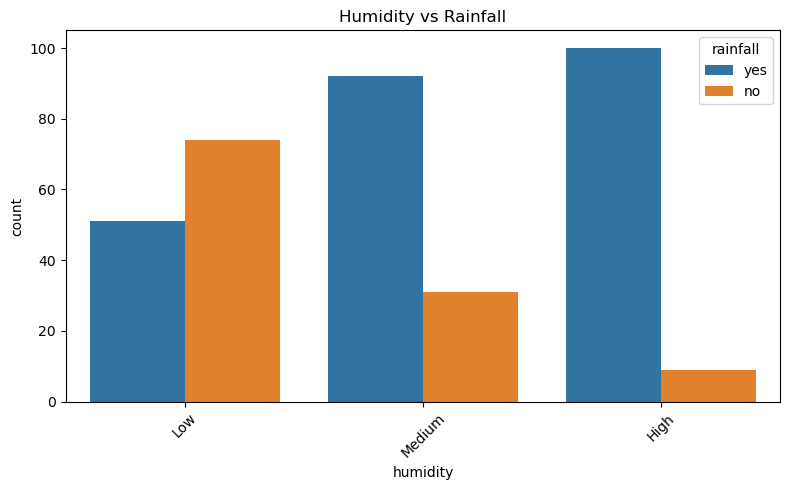

In [94]:
plt.figure(figsize=(8, 5))
sns.countplot(x="humidity", hue="rainfall", data=df_cleaned)
plt.title("Humidity vs Rainfall")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

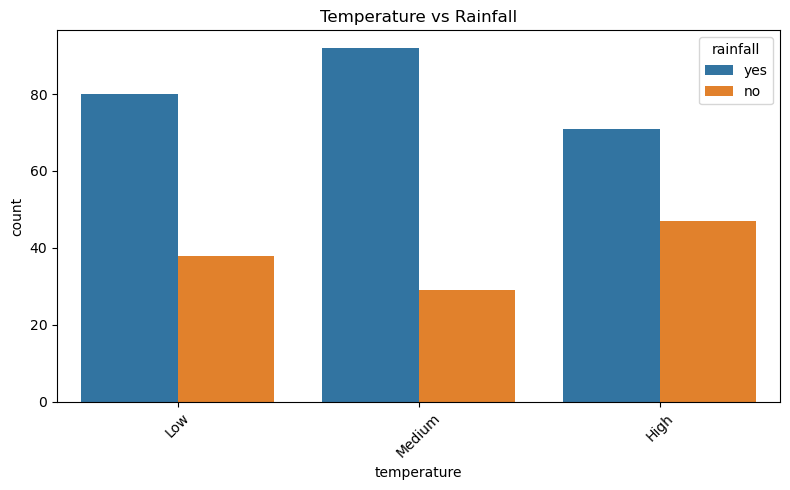

In [96]:
plt.figure(figsize=(8, 5))
sns.countplot(x="temperature", hue="rainfall", data=df_cleaned)
plt.title("Temperature vs Rainfall")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

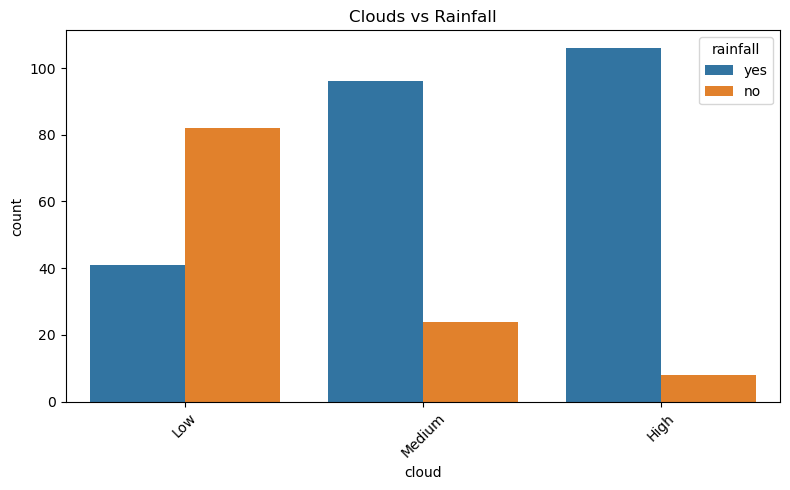

In [98]:
plt.figure(figsize=(8, 5))
sns.countplot(x="cloud", hue="rainfall", data=df_cleaned)
plt.title("Clouds vs Rainfall")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

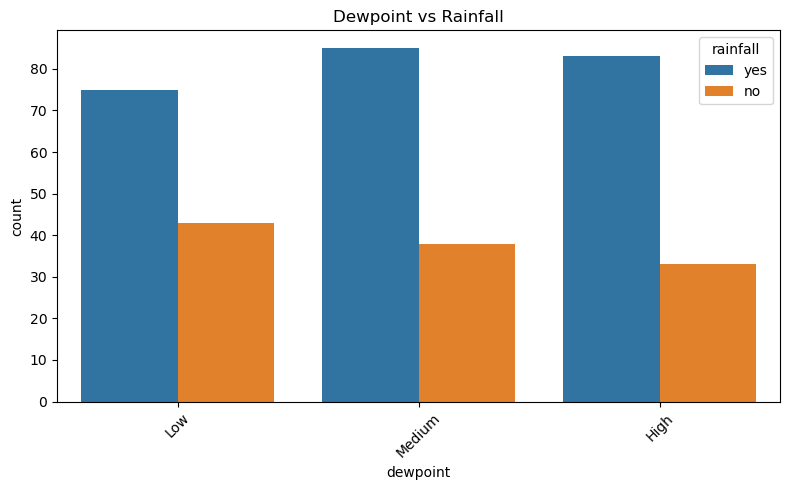

In [100]:
plt.figure(figsize=(8, 5))
sns.countplot(x="dewpoint", hue="rainfall", data=df_cleaned)
plt.title("Dewpoint vs Rainfall")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Splitting Data And Creating the Decision Tree

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned data
data = pd.read_csv("cleaned_weather_data.csv")

# Separate features (X) and target (y)
X = data.drop(columns=['rainfall'])
y = data['rainfall']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
import pandas as pd
import graphviz
from math import log2
from random import random
from graphviz import Source

def safe_log2(value):
    return log2(value) if value > 0 else 0

def calculate_entropy(yes_count, no_count, total_rows):
    return -(yes_count/total_rows) * safe_log2(yes_count/total_rows) - \
           (no_count/total_rows) * safe_log2(no_count/total_rows)

def calculate_category_gain(df, category_name):
    result = df.columns[-1]
    total_rows = df[result].count()
    yes_count = sum((df[result] == "y") | (df[result] == "Y"))
    no_count = sum((df[result] == "n") | (df[result] == "N"))
    entropy = calculate_entropy(yes_count, no_count, total_rows)

    values = df[category_name].unique()
    gain = entropy

    for value in values:
        vdf = df[df[category_name] == value]
        value_total = vdf[vdf.columns[0]].count()
        value_yes = sum((vdf[result] == "y") | (vdf[result] == "Y"))
        value_no = sum((vdf[result] == "n") | (vdf[result] == "N"))
        value_entropy = calculate_entropy(value_yes, value_no, value_total)
        gain -= (value_total / total_rows) * value_entropy

    return gain

def lerp(a, b, alpha):
    return tuple(int(alpha * b[i] + (1.0 - alpha) * a[i]) for i in range(3))

def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

def sanitize_node_name(node_name):
    """Ensure that problematic characters are handled for Graphviz."""
    return node_name.replace('%', '_percent_').replace('<', '_lt_').replace('>', '_gt_')

def add_frame_to_graph_id3(dataframe, graph, parent_name="", edge_name=""):
    node_name = ""
    color = "white"
    node_id = str(random())

    result = dataframe.columns[-1]
    total_rows = dataframe[result].count()
    yes_count = sum((dataframe[result] == "y") | (dataframe[result] == "yes"))
    no_count = sum((dataframe[result] == "n") | (dataframe[result] == "no"))
    break_on_category = ""

    if yes_count / total_rows > .8:
        node_name = f"Yes {int((yes_count/total_rows)*100)}%"
        node_id += node_name
        color = "green"
    elif no_count / total_rows > .8:
        node_name = f"No {int((no_count/total_rows)*100)}%"
        node_id += node_name
        color = "red"
    elif len(dataframe.columns[0:-1]) > 0 and total_rows > 1:
        largest_gain = -1
        for category in dataframe.columns[0:-1]:
            gain = calculate_category_gain(dataframe, category)
            if gain > largest_gain:
                largest_gain = gain
                node_name = category
                break_on_category = category
        node_id += node_name
    else:
        node_name = f"Yes: {int(100*(yes_count/total_rows))}%, No: {int(100*(no_count/total_rows))}%"
        node_id += node_name
        alpha = yes_count / total_rows
        color = f"#{rgb_to_hex(lerp((255, 0, 0), (0, 255, 0), alpha))}"

    entries = dataframe[dataframe.columns[0]].count()
    sanitized_node_name = sanitize_node_name(node_name)  # Sanitize the node name

    graph.node(node_id, f'''<
        <TABLE BORDER="1" CELLBORDER="0" CELLSPACING="0" BGCOLOR="{color}">
          <TR>
            <TD>{sanitized_node_name}</TD>
          </TR>
          <TR>
            <TD>{entries} rows</TD>
          </TR>
        </TABLE>>''')

    if edge_name:
        graph.edge(parent_name, node_id, label=str(edge_name))

    if break_on_category:
        values = dataframe[break_on_category].unique()
        for value in values:
            vdf = dataframe[dataframe[break_on_category] == value]
            rows = vdf[vdf.columns[-1]].count()
            if rows > 0:
                vdf = vdf.drop(columns=[break_on_category])
                add_frame_to_graph_id3(vdf, graph, node_id, value)

# Load your cleaned dataset
df = pd.read_csv("cleaned_weather_data.csv")

# Build the decision tree
s = graphviz.Digraph('structs', filename='structs.gv', node_attr={'shape': 'plaintext'})
add_frame_to_graph_id3(df, s)

# Save the graph as a PNG file
s.render(filename='decision_tree', format='png', cleanup=True)

Error: decision_tree: syntax error in line 131 near '%'


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpng', '-O', 'decision_tree']' returned non-zero exit status 1. [stderr: b"Error: decision_tree: syntax error in line 131 near '%'\r\n"]

In [171]:
import os
from math import log2
from random import random
import pandas as pd
import graphviz

def save_graph_as_jpg(graph, filename):
    graph.save('temp.dot')
    src = graphviz.Source.from_file('temp.dot')
    src.render(filename, format="jpg")
    os.remove('temp.dot')
    os.remove(filename)


def safe_log2(value):
    if value > 0:
        return log2(value)
    else:
        return 0


def calculate_entropy(yes_count, no_count, total_rows):
    return -(yes_count/total_rows) * safe_log2(yes_count/total_rows) - \
        (no_count/total_rows) * safe_log2(no_count/total_rows)


def calculate_category_gain(df, category_name):
    print(category_name)
    result = df.columns[-1]
    total_rows = df[result].count()
    yes_count = sum((df[result] == "y") | (df[result] == "Y"))
    no_count = sum((df[result] == "n") | (df[result] == "N"))
    entropy = calculate_entropy(yes_count, no_count, total_rows)

    values = df[category_name].unique()

    gain = entropy

    for value in values:
        vdf = df[df[category_name] == value]
        value_total = vdf[vdf.columns[0]].count()
        value_yes = sum((vdf[result] == "y") | (vdf[result] == "Y"))
        value_no = sum((vdf[result] == "n") | (vdf[result] == "N"))
        value_entropy = calculate_entropy(value_yes, value_no, value_total)
        value_gain = (value_total / total_rows) * value_entropy
        # print("{} Entropy: {}, Gain: {}".format(value, value_entropy, value_gain))
        gain -= value_gain

    # print("{} Gain: {}", category_name, gain)

    return gain


def lerp(a, b, alpha):
    c = [0, 0, 0]
    for i in range(0, len(a)-1):
        c[i] = int(alpha*b[i] + (1.0-alpha)*a[i])
    return tuple(c)


def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

# def rgb_to_hex(rgb):
#     return ('{:X}{:X}{:X}').format(int(rgb[0]), rgb[1], rgb[2])


def add_frame_to_graph_id3(dataframe, graph, parent_name="", edge_name=""):
    node_name = ""
    color = "white"
    node_id = str(random())

    result = dataframe.columns[-1]
    total_rows = dataframe[result].count()
    yes_count = sum((dataframe[result] == "yes") | (dataframe[result] == "Y"))
    no_count = sum((dataframe[result] == "no") | (dataframe[result] == "N"))

    break_on_category = ""

  #  print(f"""Processing data frame:
  #   {dataframe}
  # 
  #   Total rows: {total_rows}
  #   Yes count: {yes_count}
  #   No count: {no_count}
  #  
  #   """)

# Tweek the entropy percentage and/or number of rows
    if yes_count/total_rows > .75:
        node_name = f"Yes {int((yes_count/total_rows)*100)}%"
        node_id += node_name
        color = "green"
    elif no_count/total_rows > .75: #emperical
        node_name = f"No {int((no_count/total_rows)*100)}%"
        node_id += node_name
        color = "red"
    elif len(dataframe.columns[0:-1]) > 0 and total_rows > 10:
        largest_gain = -1
        for category in dataframe.columns[0:-1]:
            gain = calculate_category_gain(dataframe, category)
            if gain > largest_gain:
                largest_gain = gain
                node_name = category
                break_on_category = category

        # Break on category
        node_id += node_name
    else:
        node_name = "Yes: {}%, No: {}%".format(int(100*(yes_count/total_rows)), int(100*(no_count/total_rows)))
        node_id += "Yes-{}-percent-No-{}-percent".format(int(100*(yes_count/total_rows)), int(100*(no_count/total_rows)))
        alpha = yes_count/total_rows
        color = f"#{rgb_to_hex(lerp((255, 0, 0), (0, 255, 0), alpha))}"

    entries = dataframe[dataframe.columns[0]].count()
    graph.node(node_id, f'''<
        <TABLE BORDER="1" CELLBORDER="0" CELLSPACING="0" BGCOLOR="{color}">
          <TR>
            <TD>{node_name}</TD>
          </TR>
          <TR>
            <TD>{entries} rows</TD>
          </TR>
        </TABLE>>''')

    if edge_name:
        graph.edge(parent_name, node_id, label=str(edge_name))

    if break_on_category:
        # print(f"Breaking on category: {break_on_category}")
        values = df[break_on_category].unique()
        for value in values:
            vdf = dataframe[dataframe[break_on_category] == value]
            rows = vdf[vdf.columns[-1]].count()
            if rows > 0:
                # print(f"Value: {value}")
                # print(vdf)
                vdf = vdf.drop(columns=[break_on_category])
                # print(f"Dropping column: ")
                # print(vdf)
                add_frame_to_graph_id3(vdf, graph, node_id, value)



s = graphviz.Digraph('structs', filename='structs.gv',
                     node_attr={'shape': 'plaintext'})
df = pd.read_csv('cleaned_weather_data.csv')
print(df)
add_frame_to_graph_id3(df, s)
save_graph_as_jpg(s, "Rain")

    pressure maxtemp temperature   mintemp dewpoint humidity   cloud sunshine  \
0       High     Low         Low  Very Low      Low      Low     Low     High   
1       High     Low         Low  Very Low      Low   Medium  Medium      Low   
2       High     Low         Low       Low      Low     High    High      Low   
3       High     Low         Low       Low   Medium     High    High      Low   
4     Medium     Low         Low       Low   Medium     High  Medium      Low   
..       ...     ...         ...       ...      ...      ...     ...      ...   
352     High     Low         Low  Very Low      Low   Medium    High      Low   
353     High     Low         Low  Very Low      Low      Low  Medium      Low   
354     High     Low         Low  Very Low      Low      Low  Medium   Medium   
355     High     Low         Low  Very Low      Low   Medium    High   Medium   
356     High     Low         Low  Very Low      Low      Low     Low   Medium   

    windspeed wind_direct_c

### The Decision tree saves to the folder as Rain.jpg 

### The Algorithm can be tweaked to give more accurate results, for this example I went with 70% confidence an altered the amount of rows just to make the decision tree more readable for the purposes of this project. 

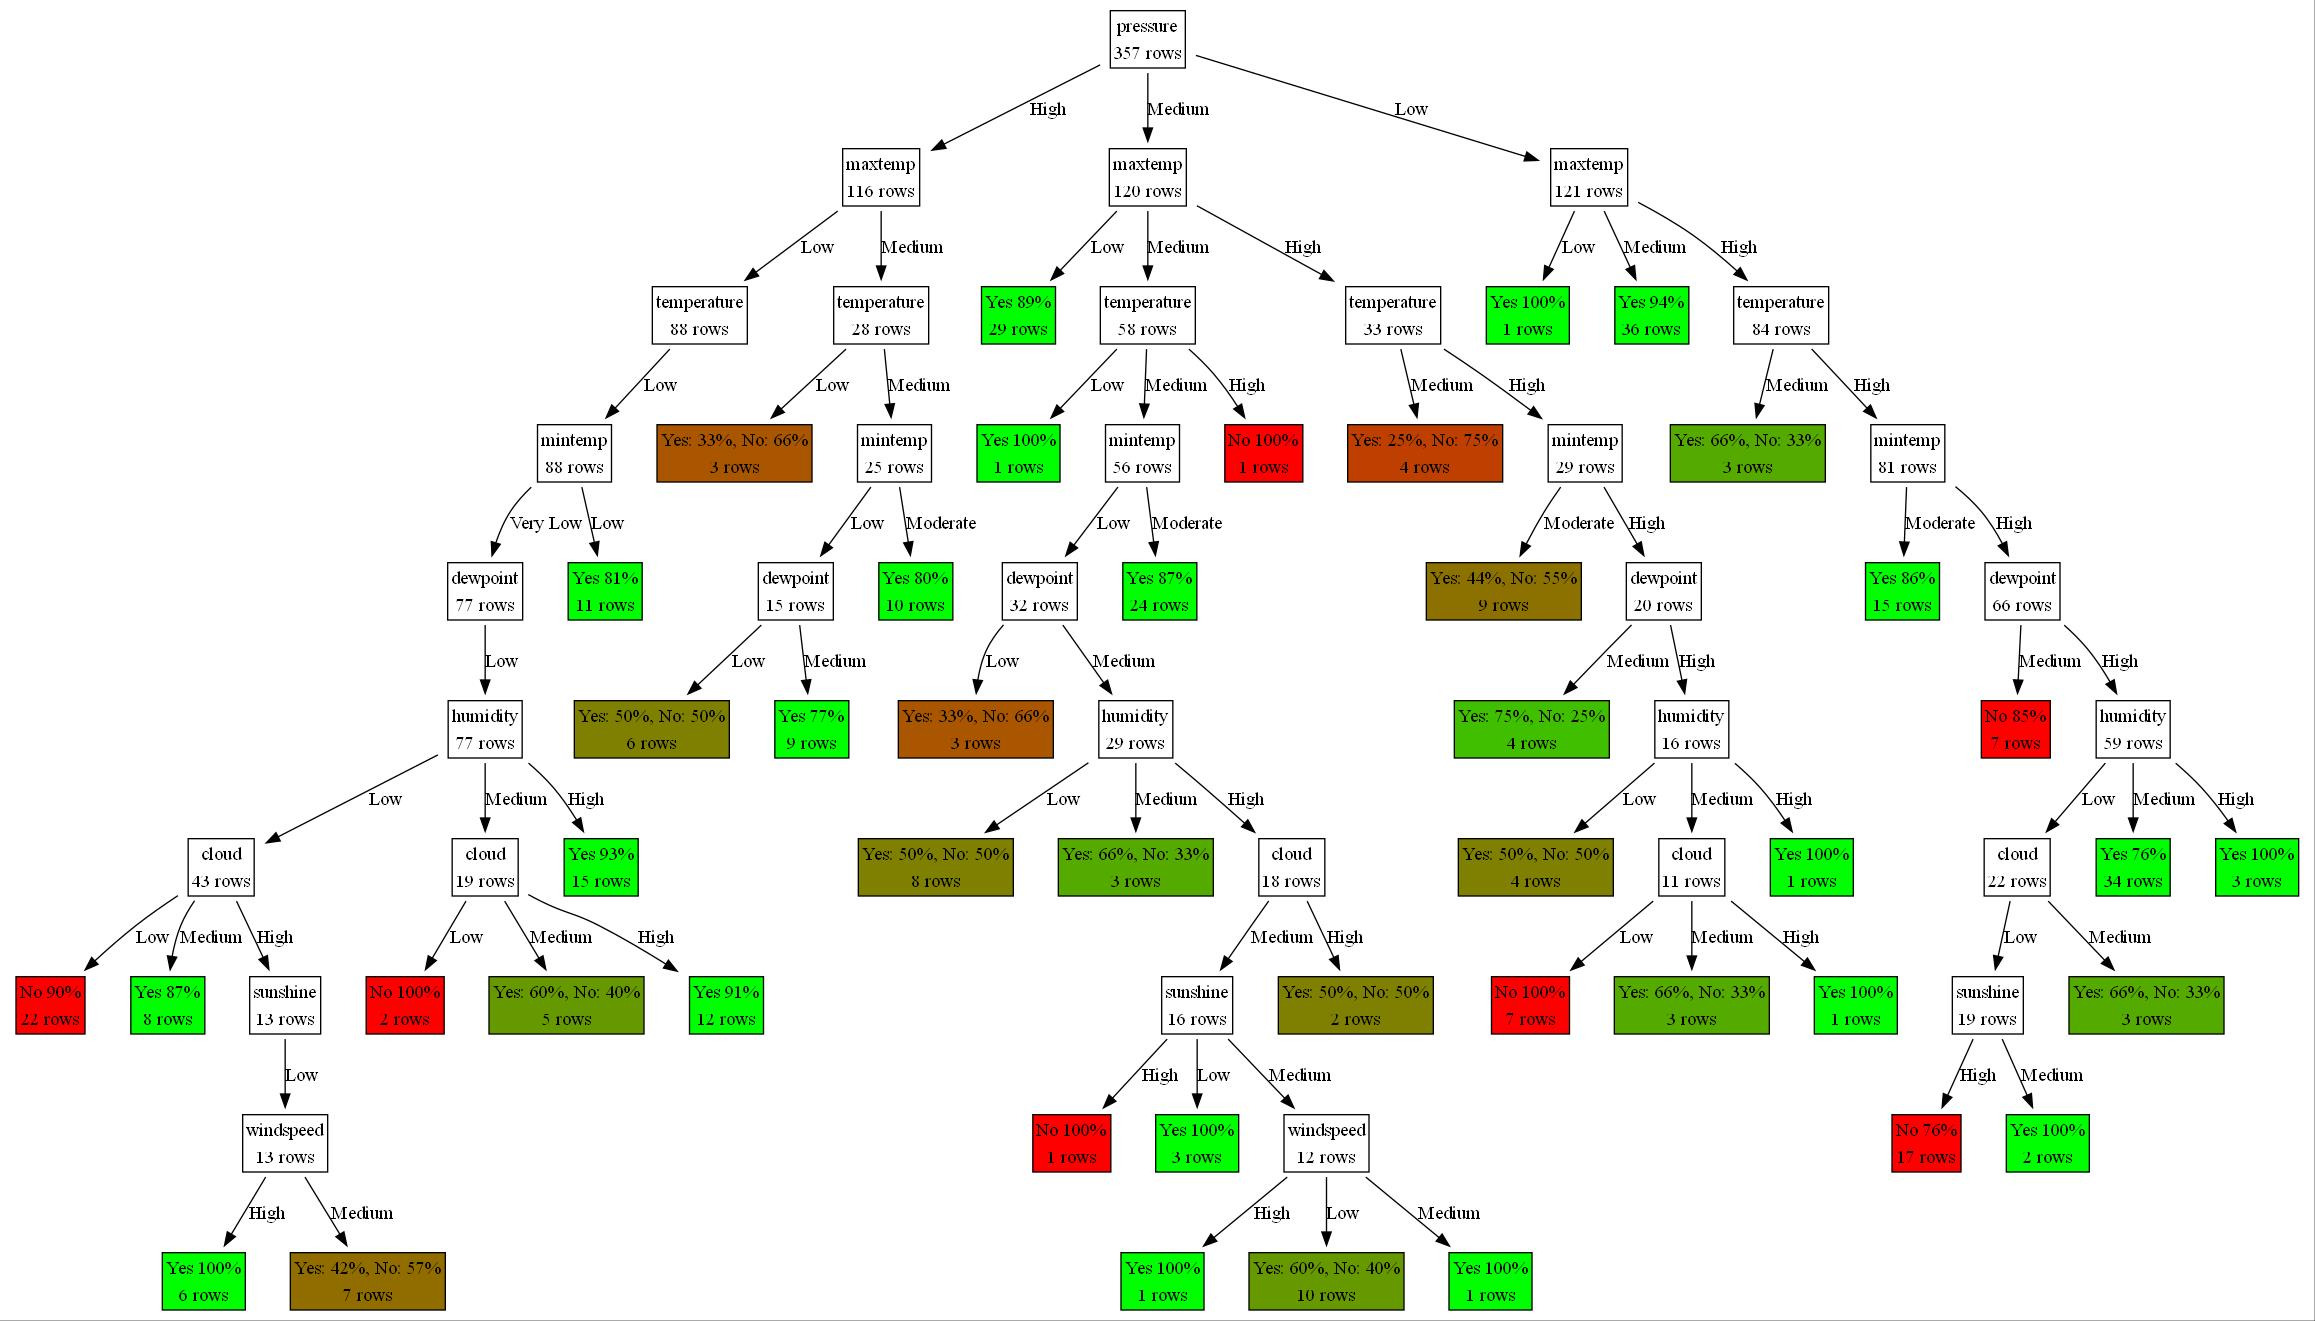

In [174]:
from IPython.display import Image


Image(filename='Rain.jpg')

### What I learned from this project and this dataset

##### Working with all numeric data and converting to categorical was challenging however using Python scripting allowed me to do it much more easily. I had to troubleshoot quite a bit with cleaning the data because everytime I stopped working on the jupyter notebook and came back I had to rerun the cells and that caused some issues that I still am not fully sure how to fix other than rerunning specific cells and saving the data to a seperate (clean) csv file. 

##### The decision tree algorithm had to be tweaked a few times to give a concise decision tree picture. However I did learn a few things from the weather data. Firstly, Pressure seems to be a strong factor in calculating if it will rain or not. If the pressure is low, there is a higher likelihood that it will rain (this information lines up with our understanding of weather patterns). When the pressure is not high however, it appears that all of the variations of temperature data are the next factor (temp, maxtemp, mintemp). It appears that high pressure and high temps lead to no rainfall more often than not. I tweaked the algorithm to be more accurate and this general trend seemed to reign true. In conclusion, when deciding to plan an important event outdoors, you may want to make sure the atmospheric pressure is high and that the temperature is not too cold.
